In [1]:
import numpy as np
import pandas as pd

municipalities = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/municipalities.csv', header=None)
popsize = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/popsize.csv', delimiter=';', header=None)
proc = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/proc_2013.csv', delimiter=';')
cpv = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/cpv_codes.xlsx', sheet_name='CPV codes')

In [2]:
col1 = ['municipality']

municipalities.columns = (col1)
municipalities.head()

,municipality
0,ABRANTES
1,AGUIAR DA BEIRA
2,ALANDROAL
3,ALBERGARIA-A-VELHA
4,ALBUFEIRA


In [3]:
col2 = ['municipality', 'pop']
popsize = popsize.iloc[:, :-1]
popsize.columns = col2
popsize.head()

,municipality,pop
0,Arcos de Valdevez,22 284
1,Caminha,16 465
2,Melgaço,8 874
3,Monção,18 931
4,Paredes de Coura,9 039


In [4]:
proc.drop(proc.columns[0], axis = 1, inplace=True)
proc.head()

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue
0,3046974,21-02-2017,Aquisição de serviços,PT EMPRESAS / MEO,"EPRALIMA - Escola Profissional do Alto Lima, C...",MEO (504615947),"64000000-6, Serviços postais e de telecomunica...",01-12-2013,"247,00 €",744 dias,"Portugal, Viana do Castelo, Arcos de Valdevez",-,-
1,2332852,09-08-2016,Aquisição de serviços,CP 07/2013 - Aquisição de serviços de saúde no...,"Rádio e Televisão de Portugal, S. A. (500225680)","Atlanticare, Serviços Saúde S.A. (507528212)","85147000-1, Serviços de medicina do trabalho",01-12-2013,"69.744,24 €",365 dias,Portugal,-,-
2,1467402,29-05-2015,Aquisição de serviços,Prestação Serviços Médicos-Especialidade de Ci...,Centro Hospitalar do Oeste (510412009),GS24 (507824652),"85121000-3, Serviços de prática médica",01-12-2013,"12.775,62 €",31 dias,"Portugal, Leiria, Caldas da Rainha",31-12-2013,"12.775,62 €"
3,1407921,17-03-2015,Aquisição de serviços,Aquisição de Serviços de Seguros no Ramo Acide...,"Centro Hospitalar de São João, E. P. E. (50982...",Isaura Manuela Silva Santos (209910496),"66510000-8, Serviços de seguros",01-12-2013,"112.120,04 €",31 dias,"Portugal, Porto, Porto",-,-
4,1177748,01-09-2014,Aquisição de serviços,310/AgdA/2013,"AgdA - Águas Públicas do Alentejo, S. A. (5091...",ALEXANDRE GUERREIRO FIGUEIREDO (219339996),"79100000-5, Serviços jurídicos",01-12-2013,"12.000,00 €",365 dias,"Portugal, Beja",30-11-2014,"12.000,00 €"


In [5]:
cpv.head()

,CODE,EN,PT
0,03000000-1,"Agricultural, farming, fishing, forestry and r...","Produtos da agricultura, da pesca, da silvicul..."
1,03100000-2,Agricultural and horticultural products,Produtos agrícolas e hortofrutícolas
2,03110000-5,"Crops, products of market gardening and hortic...","Cereais, produtos de culturas industriais e da..."
3,03111000-2,Seeds,Sementes
4,03111100-3,Soya beans,Soja


In [6]:
# Remove euro sign
proc['initialValue'] = proc['initialValue'].str.replace('€', '')
proc['finalValue'] = proc['finalValue'].str.replace('€', '')

# Remove dot in the middle of the number
proc['initialValue'] = proc['initialValue'].str.replace('.', '')
proc['finalValue'] = proc['finalValue'].str.replace('.', '')

# Replace the commas by dots to facilitate the conversion of string to float
proc['initialValue'] = proc['initialValue'].str.replace(',', '.')
proc['finalValue'] = proc['finalValue'].str.replace(',', '.')

# Replace slash by nan
proc['finalValue'] = proc['finalValue'].replace('-', np.nan)

# Convert string to float
proc['initialValue'] = proc['initialValue'].astype(float)
proc['finalValue'] = proc['finalValue'].astype(float)

In [7]:
proc.dtypes

ID                    int64
dateBase             object
type                 object
description          object
contracting          object
contractor           object
CPV                  object
initialDate          object
initialValue        float64
proposedDuration     object
local                object
closingDate          object
finalValue          float64
dtype: object

In [8]:
# Split CPV into description and code
proc['CPV_description'] = proc['CPV'].str.split(',').str[1]
proc['CPV_code'] = proc['CPV'].str.split(',').str[0]

# Separate contracting and contracted into name and NIF of each one.
proc['contracting_name'] = proc['contracting'].map(lambda x: str(x)[:-11])
proc['contracting_nif'] = proc['contracting'].map(lambda x: str(x)[-11:])
proc['contractor_name'] = proc['contractor'].map(lambda x: str(x)[:-11])
proc['contractor_nif'] = proc['contractor'].map(lambda x: str(x)[-11:])

In [29]:
proc

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue,CPV_description,CPV_code,contracting_name,contracting_nif,contractor_name,contractor_nif
0,3046974,21-02-2017,Aquisição de serviços,PT EMPRESAS / MEO,"EPRALIMA - Escola Profissional do Alto Lima, C...",MEO (504615947),"64000000-6, Serviços postais e de telecomunica...",01-12-2013,247.00,744 dias,"Portugal, Viana do Castelo, Arcos de Valdevez",-,NaN,Serviços postais e de telecomunicações,64000000-6,"EPRALIMA - Escola Profissional do Alto Lima, C...",(504404830),MEO,(504615947)
1,2332852,09-08-2016,Aquisição de serviços,CP 07/2013 - Aquisição de serviços de saúde no...,"Rádio e Televisão de Portugal, S. A. (500225680)","Atlanticare, Serviços Saúde S.A. (507528212)","85147000-1, Serviços de medicina do trabalho",01-12-2013,69744.24,365 dias,Portugal,-,NaN,Serviços de medicina do trabalho,85147000-1,"Rádio e Televisão de Portugal, S. A.",(500225680),"Atlanticare, Serviços Saúde S.A.",(507528212)
2,1467402,29-05-2015,Aquisição de serviços,Prestação Serviços Médicos-Especialidade de Ci...,Centro Hospitalar do Oeste (510412009),GS24 (507824652),"85121000-3, Serviços de prática médica",01-12-2013,12775.62,31 dias,"Portugal, Leiria, Caldas da Rainha",31-12-2013,12775.62,Serviços de prática médica,85121000-3,Centro Hospitalar do Oeste,(510412009),GS24,(507824652)
3,1407921,17-03-2015,Aquisição de serviços,Aquisição de Serviços de Seguros no Ramo Acide...,"Centro Hospitalar de São João, E. P. E. (50982...",Isaura Manuela Silva Santos (209910496),"66510000-8, Serviços de seguros",01-12-2013,112120.04,31 dias,"Portugal, Porto, Porto",-,NaN,Serviços de seguros,66510000-8,"Centro Hospitalar de São João, E. P. E.",(509821197),Isaura Manuela Silva Santos,(209910496)
4,1177748,01-09-2014,Aquisição de serviços,310/AgdA/2013,"AgdA - Águas Públicas do Alentejo, S. A. (5091...",ALEXANDRE GUERREIRO FIGUEIREDO (219339996),"79100000-5, Serviços jurídicos",01-12-2013,12000.00,365 dias,"Portugal, Beja",30-11-2014,12000.00,Serviços jurídicos,79100000-5,"AgdA - Águas Públicas do Alentejo, S. A.",(509133843),ALEXANDRE GUERREIRO FIGUEIREDO,(219339996)
5,1129401,24-07-2014,Aquisição de serviços,Contrato para a Aquisição de Serviços de Segur...,Secretaria-Geral do Ministério da Defesa Nacio...,"Grupo 8 - Vigilância e Prevenção Eletrónica, L...","79710000-4, Serviços de segurança",01-12-2013,82500.00,424 dias,"Portugal, Lisboa, Lisboa",-,NaN,Serviços de segurança,79710000-4,Secretaria-Geral do Ministério da Defesa Nacio...,(600032205),"Grupo 8 - Vigilância e Prevenção Eletrónica, Lda",(500131210)
6,1064820,15-05-2014,Aquisição de serviços,"""Aquisição de Serviços de Bar""","ALTERNÂNCIA - Ensino e Formação Profissional, ...",Mário Rui Pereira Barbosa (197017240),"55500000-5, Serviços de cantinas e de fornecim...",01-12-2013,74999.00,274 dias,"Portugal, Porto, Porto",-,NaN,Serviços de cantinas e de fornecimento de ref...,55500000-5,"ALTERNÂNCIA - Ensino e Formação Profissional, ...",(501462244),Mário Rui Pereira Barbosa,(197017240)
7,1055053,07-05-2014,Aquisição de serviços,NPD 3014003200 - PAGAMENTO DE PORTAGENS E.P DE...,Ministério da Defesa Nacional Marinha (600012662),EP - BAIXO TEJO (504598686),"79941000-2, Serviços de cobrança de portagens",01-12-2013,6.42,31 dias,"Portugal, Setúbal, Montijo",-,NaN,Serviços de cobrança de portagens,79941000-2,Ministério da Defesa Nacional Marinha,(600012662),EP - BAIXO TEJO,(504598686)
8,1055041,07-05-2014,Aquisição de serviços,NPD 3014003075 - COMUNICAÇÕES FIXAS DEZ2013/ ...,Ministério da Defesa Nacional Marinha (600012662),VODAFONE PORTUGAL (502544180),"64210000-1, Serviços telefónicos e de transmis...",01-12-2013,58.99,61 dias,"Portugal, Setúbal, Montijo",-,NaN,Serviços telefónicos e de transmissão de dados,64210000-1,Ministério da Defesa Nacional Marinha,(600012662),VODAFONE PORTUGAL,(502544180)
9,1053957,06-05-2014,Aquisição de serviços,NPD 3014002624 - PAGAMENTO PORTAGENS BRISA DEZ...,Minist

In [10]:
municipalProc = proc.loc[proc['contracting_name'].str.contains("^Município d|^Municipio d")]
# Create a column with the municipalities
municipalProc['municipality'] = municipalProc['contracting_name'].map(lambda x: str(x)[13:])
municipalProc['municipality'] = municipalProc['municipality'].str.strip()

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
# Change the date to pandas date type 
municipalProc['initialDate'] = pd.to_datetime(municipalProc['initialDate'])
municipalProc['initialMonth'] = municipalProc['initialDate'].dt.month
municipalProc['initialMonth']

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


40       2
60       2
80       2
149      2
185      2
186      2
191      2
192      2
199      2
203      2
204      2
223      2
228      2
230      2
231      2
232      2
233      2
236      2
241      2
243      2
244      2
245      2
246      2
248      2
254      2
257      2
260      2
261      2
287      2
288      2
        ..
82913    8
82930    8
82932    8
82933    8
82935    8
82936    8
82939    8
82940    8
82942    8
82948    8
82949    8
82956    8
82958    8
82959    8
82962    8
82964    8
82965    8
82966    8
82967    8
82969    8
82970    8
82972    8
82973    8
82974    8
82976    8
82977    8
82978    8
82980    8
82981    8
82982    8
Name: initialMonth, Length: 20270, dtype: int64

In [12]:
expensesByCity = pd.DataFrame(municipalProc.groupby(['municipality'])['municipality','initialValue'].sum()).reset_index()
monthlyExpenses = pd.DataFrame(municipalProc.groupby(['municipality','initialMonth'])['initialValue'].sum()).reset_index()

monthlyExpenses

,municipality,initialMonth,initialValue
0,Abrantes,1,259511.02
1,Abrantes,2,91229.29
2,Abrantes,3,248446.16
3,Abrantes,4,278760.06
4,Abrantes,5,278743.52
5,Abrantes,6,904203.69
6,Abrantes,7,496567.88
7,Abrantes,8,794627.52
8,Abrantes,9,452083.48
9,Abrantes,10,8750.00


In [13]:
monthlyExpenses = pd.pivot_table(monthlyExpenses,
                                 values="initialValue",
                                 index=['municipality'],
                                 columns=['initialMonth'])
monthlyExpenses

initialMonth,1,2,3,4,5,6,7,8,9,10,11,12
municipality,,,,,,,,,,,,
Abrantes,259511.02,91229.29,248446.16,278760.06,278743.52,904203.69,496567.88,794627.52,452083.48,8750.00,220644.20,977855.55
Aguiar da Beira,257206.39,99333.74,183464.00,523775.30,431213.42,152342.30,785528.36,852134.16,1024215.34,6808.00,264149.71,135576.29
Alandroal,366671.14,97356.68,25701.92,320417.34,668373.52,754600.55,252943.26,82430.00,50077.00,NaN,7594.90,17277.00
Albergaria-a-Velha,131007.98,407694.09,271639.67,491733.33,463814.15,78674.50,358198.91,745532.70,173096.47,100000.00,764733.10,492015.21
Albufeira,456566.69,2967294.96,1362307.25,64160.34,588578.26,711835.00,77487.04,450759.98,144413.32,837000.00,349969.61,426901.02
Alcanena,39999.95,NaN,NaN,34984.36,14237.30,NaN,66774.22,121551.24,122603.98,157057.39,105566.92,108067.56
Alcobaça,NaN,316234.79,151191.36,3977.00,384000.90,384150.88,396082.61,483291.17,774808.77,34698.68,198845.20,147542.50
Alcochete,13912.83,33381.30,74032.04,123436.16,54091.75,NaN,281242.34,18000.00,15900.00,NaN,98597.84,NaN
Alcoutim,179387.23,225891.47,808656.46,27671.00,311491.38,794880.41,91333.78,896910.87,178389.19,116885.72,5747.35,116880.18


In [14]:
monthlyExpenses.plot(kind="bar", 
        figsize=(50,50),
        stacked=True)

In [15]:
monthlyProc = pd.DataFrame(municipalProc.groupby(['initialMonth'])['ID'].agg(['count'])).reset_index()

In [16]:
monthlyProc

,initialMonth,count
0,1,1381
1,2,1551
2,3,1564
3,4,1649
4,5,2145
5,6,1783
6,7,1836
7,8,1885
8,9,2359
9,10,1063


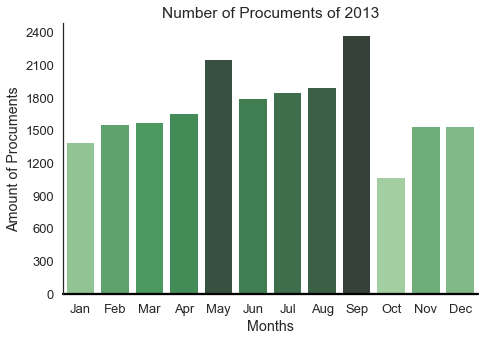

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(7, 5), sharex=True)

# Switch the month number to its respective name
month = monthlyProc['initialMonth'].apply(lambda x: calendar.month_abbr[x])

# Set the strongest colors to the highest amount of procurements
pal = sns.color_palette("Greens_d", len(month))
rank = monthlyProc['count'].argsort().argsort()

# Label axes
sns.barplot(x=month ,y=monthlyProc['count'], palette=np.array(pal[::-1])[rank])
ax3.set_xlabel('Months')
ax3.set_ylabel('Amount of Procuments')
ax3.set_title('Number of Procuments of 2013')

# Finalize the plot
sns.despine(bottom=True)
plt.yticks(np.arange(0, max(monthlyProc['count'])+100, 300))
plt.tight_layout(h_pad=2)

In [52]:
procValue = proc.loc[:,['ID', 'initialValue']]

procValue.describe()

,ID,initialValue
count,8.301600e+04,8.301600e+04
mean,8.766495e+05,5.115193e+04
std,2.352882e+05,6.233390e+05
min,5.599730e+05,-2.111000e+05
25%,7.670818e+05,3.459043e+03
50%,8.316770e+05,1.000000e+04
75%,9.180052e+05,2.811132e+04
max,4.856595e+06,1.113882e+08


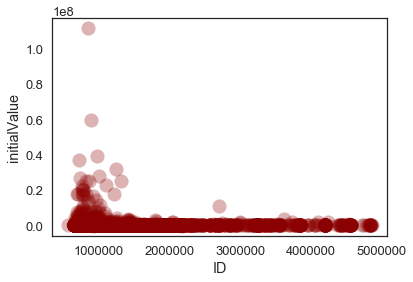

In [56]:
import seaborn as sns
df = sns.load_dataset('iris')
 
# Change shape of marker
sns.regplot(x=procValue["ID"], y=procValue["initialValue"], fit_reg=False,  scatter_kws={"color":"darkred","alpha":0.3,"s":200})
#sns.plt.show()


In [45]:
# Get the first digit of CPV_code for the groupby
municipalProc['1d_CPV_code'] = municipalProc['CPV_code'].str[0]

#= pd.DataFrame(municipalProc.groupby(['municipality','initialData','1d_CPV_code'])['initialValue']).reset_index()
municipalProc.groupby(['municipality','initialDate','1d_CPV_code'])['initialValue'].sum()

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


municipality  initialDate  1d_CPV_code
Abrantes      2013-01-03   7               13020.00
              2013-01-04   0               42331.52
              2013-01-10   6               11267.00
              2013-01-14   0               42063.00
                           3               22669.50
              2013-01-29   7               38160.00
                           8               90000.00
              2013-02-08   0               11600.00
              2013-02-13   4                7650.00
                           7               35050.92
              2013-02-14   9                5656.00
              2013-02-21   3               12112.42
                           4               13159.95
              2013-02-26   9                6000.00
              2013-03-06   5               17080.00
              2013-03-09   7               12000.00
              2013-03-12   7                5598.00
              2013-03-13   4                6398.91
              2013-03-15 

In [41]:
municipalProc.groupby(['municipality','initialMonth'])['initialValue']
